In [ ]:
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [9]:
# Importing the librairies

import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


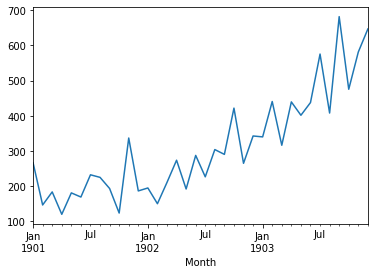

In [11]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('/home/exalis/GitHub/velib-prediction/velib-prediction/3. Modeling Research/datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
plt.show()

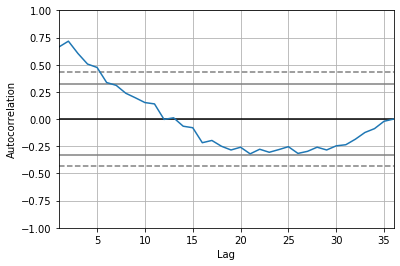

In [14]:
from pandas.plotting import autocorrelation_plot


series = pd.read_csv('/home/exalis/GitHub/velib-prediction/velib-prediction/3. Modeling Research/datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
plt.show()

In [15]:
from statsmodels.tsa.arima_model import ARIMA

/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/exalis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 22 Jan 2020   AIC                            406.340
Time:                        13:45:19   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

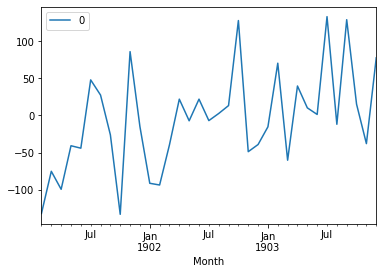

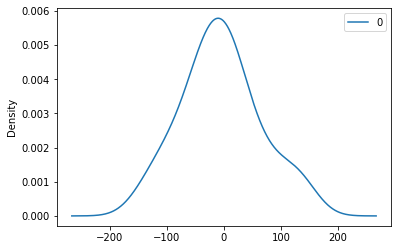

                0
count   35.000000
mean    -5.495247
std     68.132880
min   -133.296628
25%    -42.477941
50%     -7.186651
75%     24.748306
max    133.237935


In [17]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


/home/exalis/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


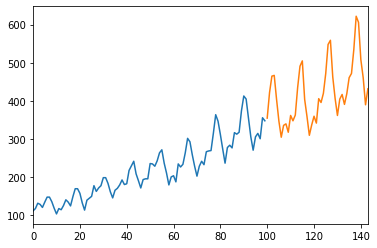

In [6]:
#divide into train and validation set
train = df[:int(0.7*(len(df)))]
test = df[int(0.7*(len(df))):]

#preprocessing (since arima takes univariate series as input)
train_viz = train
test_viz = test

train_viz.drop('Month',axis=1,inplace=True)
test_viz.drop('Month',axis=1,inplace=True)

#plotting the data
train_viz['Passengers'].plot()
test_viz['Passengers'].plot()

In [7]:
# Initializing, training and fitting the model

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

# Creating forecast data

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=886.147, BIC=901.718, Fit time=0.477 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=909.769, BIC=914.959, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=907.370, BIC=915.155, Fit time=0.073 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=904.979, BIC=912.764, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=908.785, BIC=911.380, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=884.966, BIC=897.942, Fit time=0.324 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=884.152, BIC=897.128, Fit time=0.302 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root 

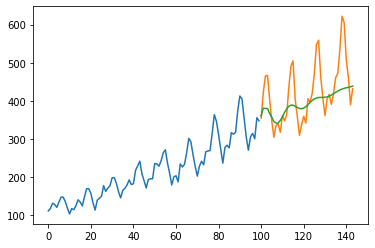

In [8]:
# Plotting the predictions vs test data

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [9]:
# Calculating the RMSE for metrics

rmse = sqrt(mean_squared_error(test,forecast))
print(rmse)

67.43792820231941
